# **第7章: 単語ベクトル**

*単語の類似度計算や単語アナロジーなどを通して，単語ベクトルの取り扱いを修得します．さらに，クラスタリングやベクトルの可視化を体験します．*

単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して，以下の処理を行うプログラムを作成せよ．


<mark>\*\*\* 気をつけると良さそうなこと \*\*\*</mark>
- 元の学習済みベクトルがそれなりの大きさなのでひとつの問題を解くために数十分〜数時間かかる場合もある
    - 重い処理を何度も回さなくて済むように適当なタイミングで中間ファイルを切り出すことを意識する
    - 試行錯誤する場合は、対象データの一部を抽出した小さめサイズのデータを使う
    - 計算量や計算効率、処理速度を意識したコーディングのありがたみを知る
- 利用可能な Python パッケージ for NLP は既に多々用意されている
    - どう動くかの具体的なイメージを"知識として持っておく"ことはもちろん大事。一方で、コードを書くときに何よりも大事なのは"とにかく正確に動く"こと。下手に自分で頑張るよりも、プロが整備した既存ツールを積極的に利用する
    - 有名所は numpy, scipy, matplotlib, sklearn, gensim などで、本章でも利用可能


## 60 単語ベクトルの読み込みと表示
Google Newsデータセット（約1,000億単語）での[学習済み単語ベクトル](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing)（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

In [1]:
from pymagnitude import Magnitude

In [2]:
vecs = Magnitude('GoogleNews-vectors-negative300.magnitude')

In [3]:
vecs.query("United_States")

array([-1.688670e-02, -2.259160e-02,  1.099916e-01,  8.169500e-02,
       -6.845950e-02, -3.468620e-02, -4.746530e-02, -3.605530e-02,
        5.111640e-02, -2.669920e-02, -6.937230e-02, -2.806840e-02,
        8.169500e-02, -3.605530e-02,  1.209450e-02, -3.582720e-02,
       -1.779950e-02,  6.343920e-02,  1.757130e-02, -1.962510e-02,
       -1.665850e-02,  2.498770e-02,  1.720000e-04, -7.804390e-02,
       -5.476760e-02,  6.617750e-02, -7.941300e-02, -3.035040e-02,
       -7.804390e-02,  4.700890e-02,  5.408300e-02, -1.022329e-01,
       -4.609610e-02, -1.198040e-02,  5.750600e-02, -1.654440e-02,
       -7.393630e-02, -7.484910e-02,  1.374900e-02,  3.810910e-02,
        3.217600e-02,  8.762820e-02,  3.035040e-02,  5.385480e-02,
       -1.061120e-02,  1.551749e-01, -1.528930e-02,  8.306420e-02,
       -9.721250e-02,  2.122250e-02, -5.790500e-03,  5.590860e-02,
        3.480000e-03, -4.221700e-03,  5.339840e-02,  7.941300e-02,
       -1.113608e-01, -1.306440e-02, -5.659320e-02,  1.158110e

## 61 単語の類似度
“United States”と”U.S.”のコサイン類似度を計算せよ．

In [9]:
vecs.similarity("United_States", "U.S.")

0.7310775

## 62 類似度の高い単語10件
“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [8]:
vecs.most_similar("United_States", topn = 10)

[('Unites_States', 0.78772485),
 ('Untied_States', 0.75413704),
 ('United_Sates', 0.7400725),
 ('U.S.', 0.73107743),
 ('theUnited_States', 0.6404394),
 ('America', 0.617841),
 ('UnitedStates', 0.6167311),
 ('Europe', 0.6132989),
 ('countries', 0.60448045),
 ('Canada', 0.601907)]

## 63 加法構成性によるアナロジー
“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [38]:
vecs.most_similar(vecs.query("Spain") - vecs.query("Madrid") + vecs.query("Athens"), topn = 10)

[('Athens', 0.924616),
 ('Greece', 0.8450406),
 ('Aristeidis_Grigoriadis', 0.6868201),
 ('Ioannis_Drymonakos', 0.6802126),
 ('Greeks', 0.66769075),
 ('Ioannis_Christou', 0.6615875),
 ('Hrysopiyi_Devetzi', 0.6429168),
 ('Heraklio', 0.63793314),
 ('Athens_Greece', 0.6331618),
 ('Lithuania', 0.6329237)]

In [41]:
vecs.most_similar(positive = ["Spain", "Athens"], negative = ["Madrid"], topn = 10)

[('Greece', 0.68984795),
 ('Aristeidis_Grigoriadis', 0.5606848),
 ('Ioannis_Drymonakos', 0.5552908),
 ('Greeks', 0.5450686),
 ('Ioannis_Christou', 0.5400862),
 ('Hrysopiyi_Devetzi', 0.5248444),
 ('Heraklio', 0.52077603),
 ('Athens_Greece', 0.516881),
 ('Lithuania', 0.5166867),
 ('Iraklion', 0.51467913)]

## 64 アナロジーデータでの実験
[単語アナロジーの評価データ](http://download.tensorflow.org/data/questions-words.txt)をダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [43]:
from tqdm import tqdm

with open("questions-words.txt", "r") as file_in:
    with open("questions-words_result.txt", "w") as file_out:
        
        index = 0
        
        for line in tqdm(file_in):
            if line[0] == ":":
                file_out.write(line)
            else:
                words = line.rstrip("\n").split(" ")
                result = vecs.most_similar(positive = [words[1], words[2]], negative = [words[0]], topn = 1)[0]
                new_line = " ".join([line.rstrip("\n"), result[0], str(result[1])]) + "\n"
                file_out.write(new_line)
                
            index += 1
            if index > 6:
                break

6it [00:13,  2.24s/it]


In [48]:
with open("questions-words.txt", "r") as file_in:
    with open("questions-words_new.txt", "w") as file_out:
        for line in file_in:
            if line[0] == ":":
                category_fine = line[2:].strip("\n")
                category_rough = "syntactic" if category_fine.startswith("gram") else "semantic"                
            else:
                file_out.write(" ".join([category_rough, category_fine, line]))

#TBD. try np.vectorize

## 65 アナロジータスクでの正解率
64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

In [148]:
import pandas as pd

def calc_acc(file_name):

    df = pd.read_csv(file_name, sep=' ', header=None, 
                     names=['category_rough', 'category_fine', 'w1', 'w2', 'w3', 'w4', 'w5', 'cos'])

    df_semantic = df[df['category_rough']=='semantic']
    df_syntactic = df[df['category_rough']=='syntactic']

    acc_semantic = np.mean(df_semantic['w4'] == df_semantic['w5'])
    acc_syntactic = np.mean(df_syntactic['w4'] == df_syntactic['w5'])                        

    print(f'semantic accuracy: {acc_semantic:.2f}')
    print(f'syntactic accuracy: {acc_syntactic:.2f}')

print('【DIRECT】')
calc_acc('questions-words_result0.txt')

print('\n【VECTOR_1】')
calc_acc('questions-words_result1.txt')

print('\n【VECTOR_2】')
calc_acc('questions-words_result2.txt')

【DIRECT】
semantic accuracy: 0.73
syntactic accuracy: 0.74

【VECTOR_1】
semantic accuracy: 0.22
syntactic accuracy: 0.19

【VECTOR_2】
semantic accuracy: 0.73
syntactic accuracy: 0.74


In [175]:
df0 = pd.read_csv('questions-words_result0.txt', sep=' ', header=None)
df2 = pd.read_csv('questions-words_result2.txt', sep=' ', header=None)

In [176]:
df0.iloc[:,:7].equals(df2.iloc[:,:7])

True

In [174]:
df2[7]

0        0.788053
1        0.899359
2        0.863108
3        0.834968
4        0.595432
           ...   
19539    0.753002
19540    0.881514
19541    0.848714
19542    0.720835
19543    0.720607
Name: 7, Length: 19544, dtype: float64

In [141]:
df = pd.read_csv('questions-words_new.txt', sep=' ', header=None, 
                 names=['category_rough', 'category_fine', 'w1', 'w2', 'w3', 'w4'])

In [142]:
def calc_most_similar(w1, w2, w3):
    results = vecs.most_similar(vecs.query(w3) + vecs.query(w2) - vecs.query(w1), topn = 3)
    
    if results[0][0] not in [w2, w3]:
        result = results[0]
    elif results[1][0] not in [w2, w3]:
        result = results[1]
    else:
        result = results[2]
        
    return result[0] + "\t" + str(result[1])

calc_most_similar('Athens', 'Greece', 'Baghdad')

'Iraqi\t0.7880527'

In [123]:
results = np.vectorize(calc_most_similar)(df['w1'], df['w2'], df['w3'])
pd.DataFrame([result.split('\t') for result in results]).to_csv('tmp.csv')

In [145]:
df['w5'], df['cos'] = zip(*[result.split('\t') for result in results])

In [146]:
df.to_csv('questions-words_result2.txt', header=False, index=False, sep=' ')

## 66 WordSimilarity-353での評価
[The WordSimilarity-353 Test Collection](http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.html)の評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

In [97]:
import numpy as np
import pandas as pd
from scipy.stats import spearmanr

df = pd.read_csv('combined.csv')
df['Machine'] = np.vectorize(vecs.similarity)(df['Word 1'], df['Word 2'])

spearmanr(df['Human (mean)'], df['Machine']).correlation

0.7000166486272194

## 67 k-meansクラスタリング
国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

In [5]:
import numpy as np
import pandas as pd

df = pd.read_csv('IP2LOCATION-COUNTRY-ENGLISH.csv')
df['COUNTRY_NAME']

0                   Andorra
1      United Arab Emirates
2               Afghanistan
3       Antigua and Barbuda
4                  Anguilla
               ...         
244                   Yemen
245                 Mayotte
246            South Africa
247                  Zambia
248                Zimbabwe
Name: COUNTRY_NAME, Length: 249, dtype: object

In [6]:
from sklearn.cluster import KMeans

In [7]:
country_vecs = np.array([vecs.query(name) for name in df['COUNTRY_NAME']])

In [8]:
kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(country_vecs)

In [10]:
df['GROUP'] = kmeans.labels_

,LANG,LANG_NAME,COUNTRY_ALPHA2_CODE,COUNTRY_ALPHA3_CODE,COUNTRY_NUMERIC_CODE,COUNTRY_NAME,GROUP
0,EN,ENGLISH,AD,AND,20,Andorra,3
1,EN,ENGLISH,AE,ARE,784,United Arab Emirates,4
2,EN,ENGLISH,AF,AFG,4,Afghanistan,4
3,EN,ENGLISH,AG,ATG,28,Antigua and Barbuda,1
4,EN,ENGLISH,AI,AIA,660,Anguilla,0
...,...,...,...,...,...,...,...
244,EN,ENGLISH,YE,YEM,887,Yemen,2
245,EN,ENGLISH,YT,MYT,175,Mayotte,1
246,EN,ENGLISH,ZA,ZAF,710,South Africa,2
247,EN,ENGLISH,ZM,ZMB,894,Zambia,2


In [26]:
for i in range(5):
    print('GROUP', i+1)
    print(list(df[df['GROUP']==i]['COUNTRY_NAME']))
    print('\n')

GROUP 1
['Anguilla', 'Argentina', 'Aruba', 'Barbados', 'Saint Barthelemy', 'Bermuda', 'Bolivia (Plurinational State of)', 'Brazil', 'Bahamas', 'Belize', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Cabo Verde', 'Curaçao', 'Dominica', 'Dominican Republic', 'Ecuador', 'Fiji', 'Grenada', 'Guadeloupe', 'Guatemala', 'Guam', 'Guyana', 'Honduras', 'Haiti', 'Jersey', 'Jamaica', 'Martinique', 'Montserrat', 'Mexico', 'Nicaragua', 'Niue', 'Panama', 'Peru', 'Puerto Rico', 'Palau', 'Paraguay', 'Suriname', 'El Salvador', 'Trinidad and Tobago', 'Uruguay', 'Vanuatu', 'Samoa']


GROUP 2
['Antigua and Barbuda', 'Antarctica', 'American Samoa', 'Aland Islands', 'Bonaire, Sint Eustatius and Saba', 'Bouvet Island', 'Cocos (Keeling) Islands', 'Congo (Democratic Republic of the)', 'Central African Republic', 'Cook Islands', 'Christmas Island', 'Western Sahara', 'Falkland Islands (Malvinas)', 'Micronesia (Federated States of)', 'United Kingdom of Great Britain and Northern Ireland', 'French Guiana', '

## 68 Ward法によるクラスタリング
国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

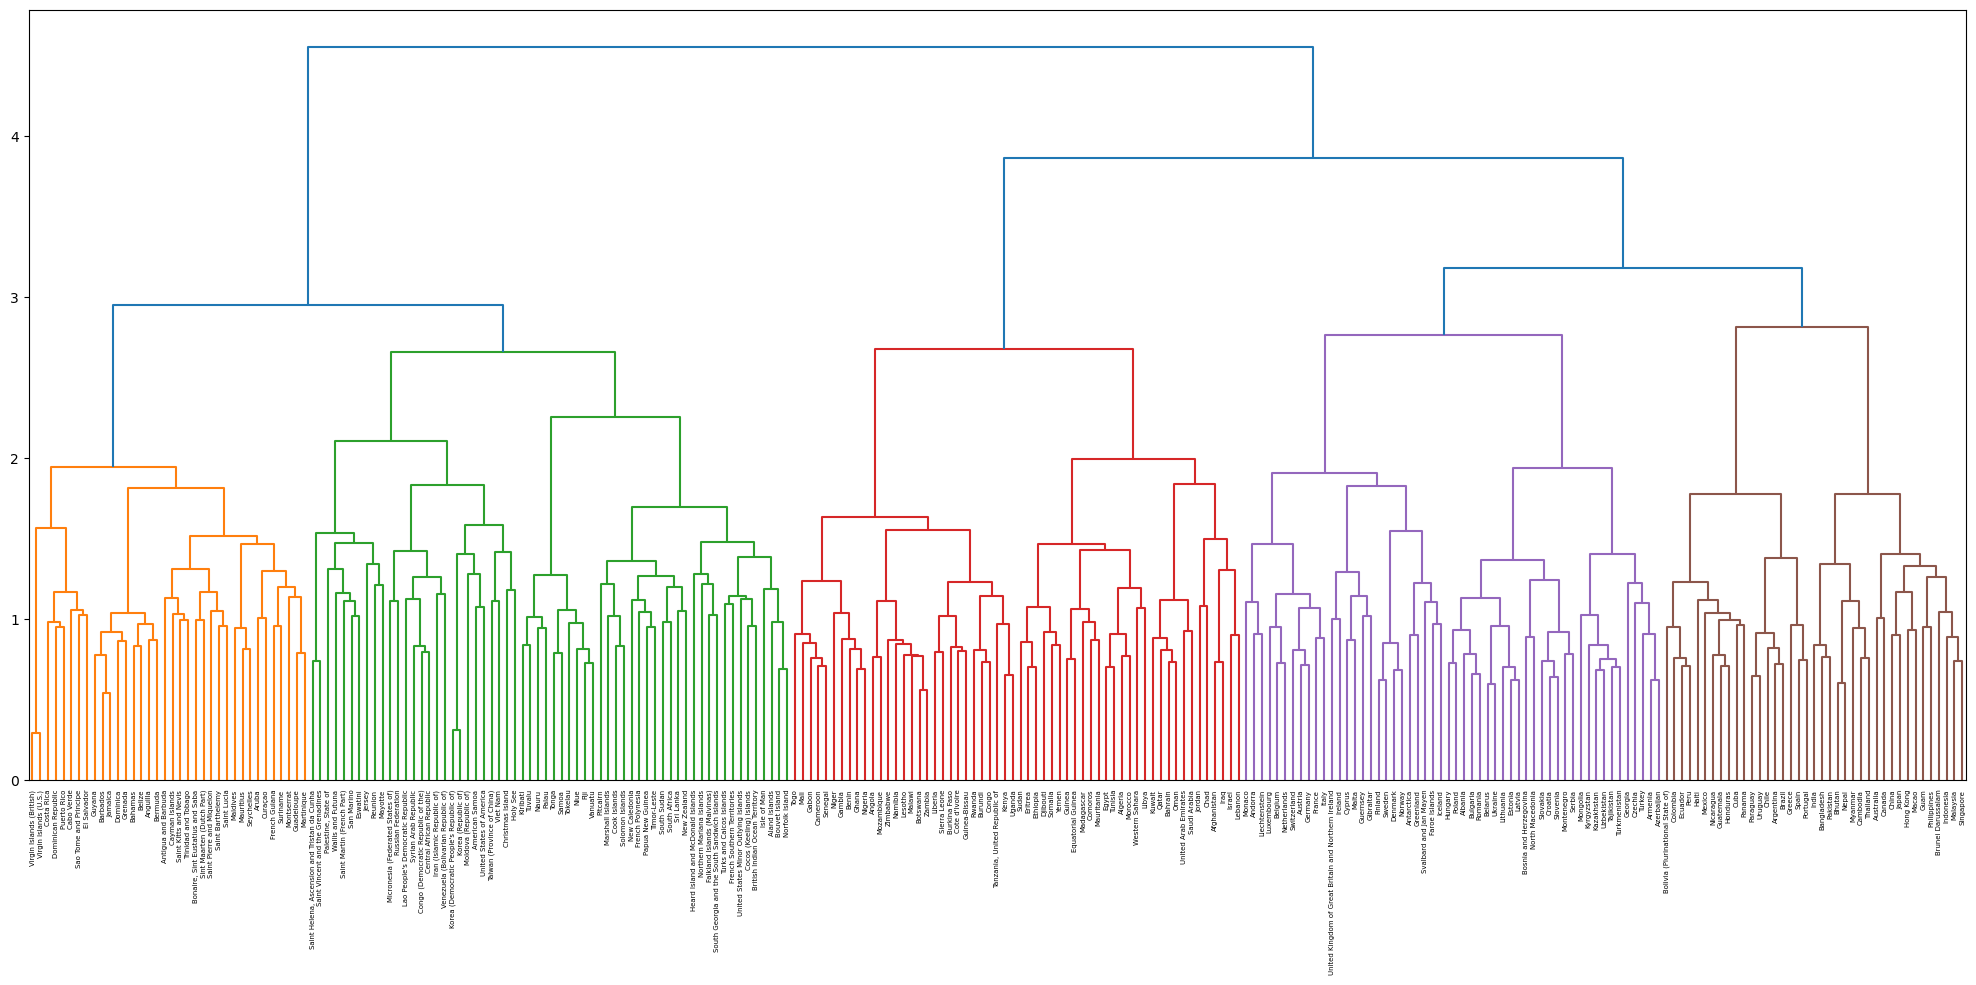

In [51]:
from matplotlib import pyplot as plt
from scipy.cluster import hierarchy

Z = hierarchy.linkage(country_vecs, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = hierarchy.dendrogram(Z, labels=list(df['COUNTRY_NAME']), color_threshold=2.9)
plt.show()

## 69 t-SNEによる可視化
ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ．

In [65]:
from sklearn.manifold import TSNE
country_vecs_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=5).fit_transform(country_vecs)

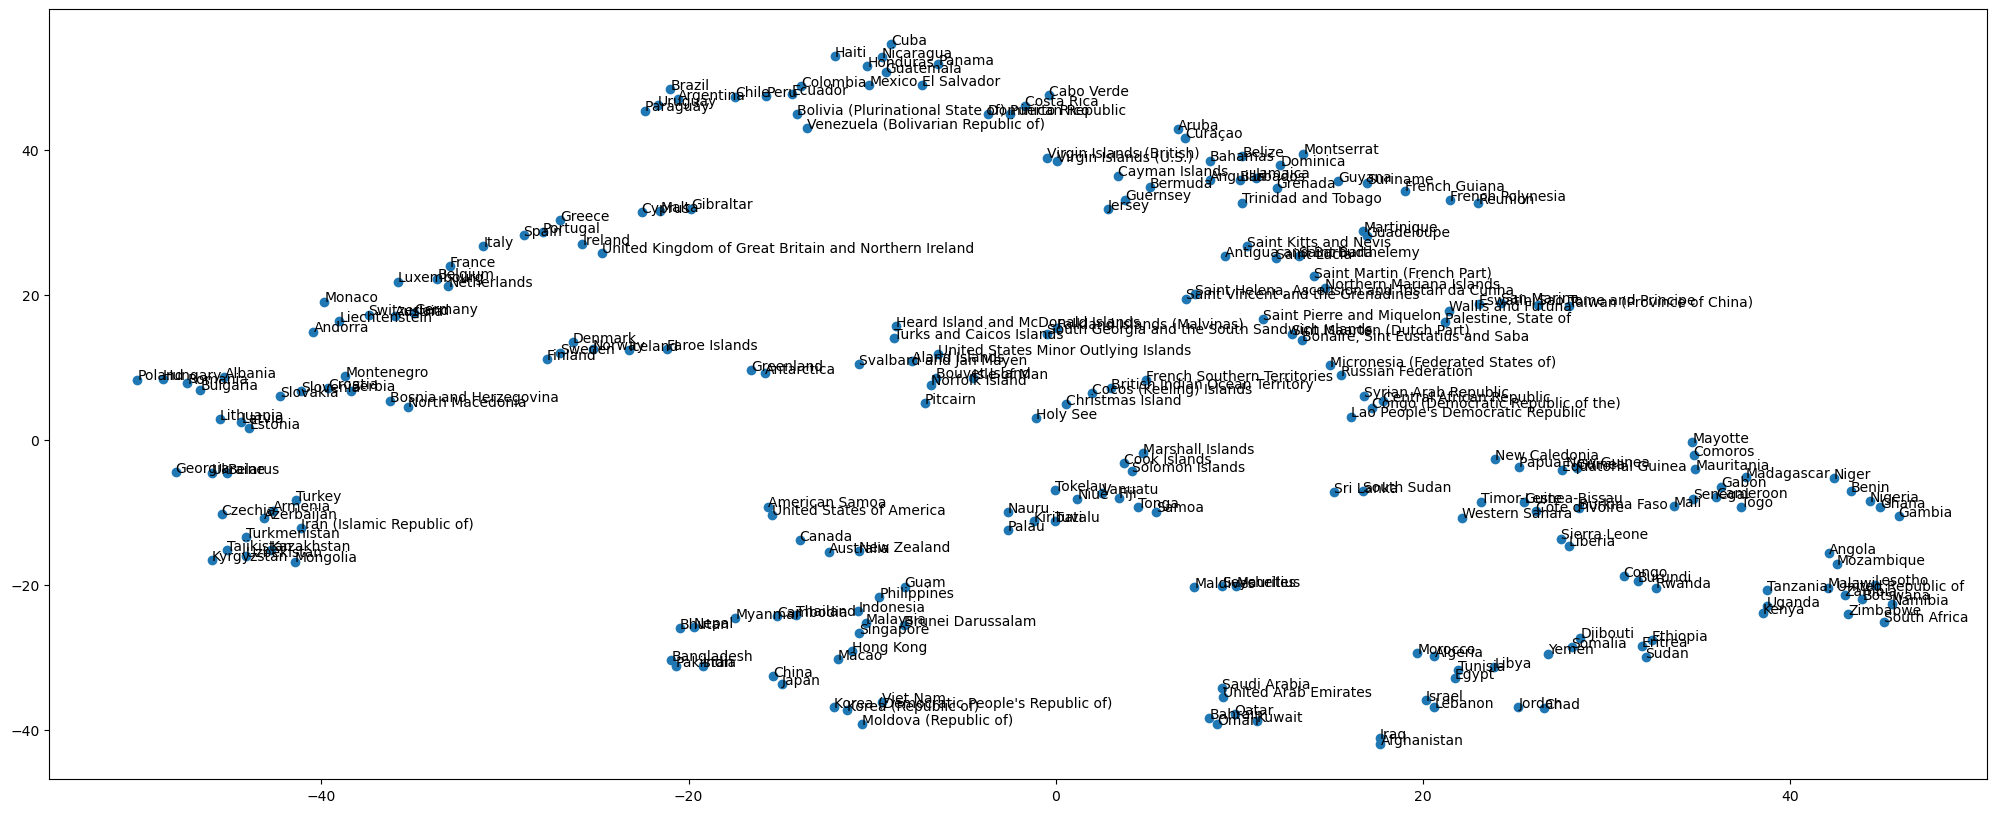

In [68]:
x, y = tuple(zip(*country_vecs_embedded))

fig = plt.figure(figsize=(25, 10))
plt.scatter(x, y)

for i, label in enumerate(df['COUNTRY_NAME']):
    plt.annotate(label, (x[i], y[i]))

plt.show()